# Figure 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib as mpl

## Settings

In [2]:
TEXT_WIDTH = 6.7261  # in
DPI = 360

In [3]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [4]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(6)

## Load Data

### UMAPs

In [5]:
path_rna_1 = '../results/fig1_rna_d1.h5ad'
path_tcr_1 = '../results/fig1_tcr_d1.h5ad'
path_moe_1 = '../results/fig1_moe_d1.h5ad'
path_poe_1 = '../results/fig1_poe_d1.h5ad'
path_cc_1 = '../results/fig1_cc_d1.h5ad'

In [6]:
ad_rna_1 = sc.read(path_rna_1)
ad_tcr_1 = sc.read(path_tcr_1)
ad_moe_1 = sc.read(path_moe_1)
ad_poe_1 = sc.read(path_poe_1)
ad_cc_1 = sc.read(path_cc_1)

In [7]:
path_rna_2 = '../results/fig1_rna_d2.h5ad'
path_tcr_2 = '../results/fig1_tcr_d2.h5ad'
path_moe_2 = '../results/fig1_moe_d2.h5ad'
path_poe_2 = '../results/fig1_poe_d2.h5ad'
path_cc_2 = '../results/fig1_cc_d2.h5ad'

In [8]:
ad_rna_2 = sc.read(path_rna_2)
ad_tcr_2 = sc.read(path_tcr_2)
ad_moe_2 = sc.read(path_moe_2)
ad_poe_2 = sc.read(path_poe_2)
ad_cc_2 = sc.read(path_cc_2)

In [9]:
mapper = {'A1101_IVTDFSVIK_EBNA-3B_EBV_binder': 'IVTDFSVIK',
          'A0301_KLGGALQAK_IE-1_CMV_binder': 'KLGGALQAK',
          'A0201_GILGFVFTL_Flu-MP_Influenza_binder': 'GILGFVFTL',
          'A0201_ELAGIGILTV_MART-1_Cancer_binder': 'ELAGIGILTV', 
          'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder': 'AVFDRKSDAK',
          'A0201_GLCTLVAML_BMLF1_EBV_binder': 'GLCTLVAML',
          'A0301_RLRAEAQVK_EMNA-3A_EBV_binder': 'RLRAEAQVK',
          'B0801_RAKFKQLL_BZLF1_EBV_binder': 'RAKFKQLL'}

color_palette = {'RAKFKQLL': 'tab:green',
                 'GILGFVFTL': 'tab:orange',
                 'KLGGALQAK': 'tab:purple',
                 'GLCTLVAML': 'tab:red',
                 'AVFDRKSDAK': 'tab:blue',
                 'IVTDFSVIK': 'tab:olive', 
                 'ELAGIGILTV': 'tab:brown'
                 }

In [10]:
cp_clone = sb.color_palette('deep')

"""palette_clonotypes = {
    '-99': 'lightgray',
    '18840': 'tab:blue', #
    '2210': 'tab:orange', #
    '18847': 'tab:olive',
    '164': 'tab:red', #
    '18944': 'tab:purple', #
    '18937': 'tab:brown',
    '18932': 'tab:pink',
    '18864': 'tab:cyan',
    '19002': 'tab:green',
}"""

palette_clonotypes_d1 = {
    '-99': 'lightgray',
    '10': cp_clone[3], #
    '26': cp_clone[9], #
    '30': cp_clone[8],
    '86': cp_clone[6], #
    '1': cp_clone[5], #
    '164': cp_clone[4],
    '202': cp_clone[0],
    '52': cp_clone[2],
    '92': cp_clone[1],
}

for ad in [ad_rna_1, ad_tcr_1, ad_moe_1, ad_poe_1, ad_cc_1]:
    ad.uns['palette_clonotypes'] = palette_clonotypes_d1


palette_clonotypes_d2 = {
    '-99': 'lightgray',
    '18840': cp_clone[3], #
    '2210': cp_clone[9], #
    '18847': cp_clone[8],
    '164': cp_clone[6], #
    '18944': cp_clone[5], #
    '18937': cp_clone[4],
    '18932': cp_clone[0],
    '18864': cp_clone[2],
    '19002': cp_clone[1],
}

for ad in [ad_rna_2, ad_tcr_2, ad_moe_2, ad_poe_2, ad_cc_2]:
    ad.uns['palette_clonotypes'] = palette_clonotypes_d2

In [11]:
cp_clone = sb.color_palette('deep')
cp_clone[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

### 10x Data

In [12]:
dict_replace = {
    'concat': 'Concat',
    'moe': 'mvTCR',
    'poe': 'PoE',
    'tcr': 'TCR',
    'rna': 'RNA',
    
    'Prediction test': 'F1-Score',
    'NMI_cell_type': 'Cell Type',
    'NMI_reactivity': 'Reactivity',
    
    'MSLE_total': 'MSLE', 
    'R2_total': 'R2'
}

In [13]:
metrics_10x = ['Prediction test', 'NMI']
data_10x = pd.read_csv(f'../results/performance_10x.csv', index_col=0)
data_10x = data_10x[data_10x['metric'].isin(metrics_10x)]

# data_10x = data_10x[data_10x['donor'].isin(['None', '1', '2'])]

In [14]:
for old, new in dict_replace.items():
    data_10x.replace(old, new, inplace=True)

In [15]:
metrics_avidity = ['MSLE_total', 'R2_total']

data_avidity_1 = pd.read_csv('../results/performance_avidity_10x_donor_1.csv', index_col=0)
data_avidity_1 = data_avidity_1[data_avidity_1['metrics'].isin(metrics_avidity)]
data_avidity_1['donor'] = 'Donor 1'

for old, new in dict_replace.items():
    data_avidity_1.replace(old, new, inplace=True)

In [16]:
data_avidity_2 = pd.read_csv('../results/performance_avidity_10x_donor_2.csv', index_col=0)
data_avidity_2 = data_avidity_2[data_avidity_2['metrics'].isin(metrics_avidity)]
data_avidity_2['donor'] = 'Donor 2'

for old, new in dict_replace.items():
    data_avidity_2.replace(old, new, inplace=True)

### Covid Data

In [17]:
metrics_covid = ['NMI_cell_type', 'NMI_reactivity']
data_covid = pd.read_csv('../results/performance_covid.csv', index_col=0)
data_covid = data_covid[data_covid['metrics'].isin(metrics_covid)]

for old, new in dict_replace.items():
    data_covid.replace(old, new, inplace=True)

In [18]:
def normalize_score(data, row):
    score = row[1]['scores']

    normalizing_method = 'TCR'
    if row[1]['metrics'] == 'Cell Type':
        normalizing_method = 'RNA'
    
    normalizing_row = data[(data['split']==row[1]['split']) 
                          & (data['model']==normalizing_method)
                          & (data['metrics']==row[1]['metrics'])].iloc[0]
    normalizing_score = normalizing_row['scores']  
    return score / normalizing_score

data_covid_norm = data_covid.copy()
data_covid_norm['scores_normalized'] = [normalize_score(data_covid, el) for el in data_covid.iterrows()]
data_covid_norm = data_covid_norm[~((data_covid_norm['model']=='TCR')
                                    & (data_covid_norm['metrics']=='Reactivity'))]
data_covid_norm = data_covid_norm[~((data_covid_norm['model']=='RNA')
                                    & (data_covid_norm['metrics']=='Cell Type'))]

### TESSA test

In [19]:
data_tessa = pd.read_csv('../results/performance_tessa_10x_donor_1.csv', index_col=0)
data_beta = pd.read_csv('../results/performance_10x_donor_1_beta.csv', index_col=0)
data_performance_tessa_10x_1 = pd.concat([data_tessa, data_beta])
data_performance_tessa_10x_1 = data_performance_tessa_10x_1[data_performance_tessa_10x_1['metrics'].isin(metrics_10x)]
data_performance_tessa_10x_1['donor'] = 'Donor 1'

In [20]:
data_tessa = pd.read_csv('../results/performance_tessa_10x_donor_2.csv', index_col=0)
data_beta = pd.read_csv('../results/performance_10x_donor_2_beta.csv', index_col=0)
data_performance_tessa_10x_2 = pd.concat([data_tessa, data_beta])
data_performance_tessa_10x_2 = data_performance_tessa_10x_2[data_performance_tessa_10x_2['metrics'].isin(metrics_10x)]
data_performance_tessa_10x_2['donor'] = 'Donor 2'

In [21]:
data_tessa = pd.read_csv('../results/performance_tessa_covid.csv', index_col=0)
data_beta = pd.read_csv('../results/performance_covid_beta.csv', index_col=0)
data_performance_tessa_covid = pd.concat([data_tessa, data_beta])
data_performance_tessa_covid = data_performance_tessa_covid[data_performance_tessa_covid['metrics'].isin(metrics_covid)]

In [22]:
data_performance_tessa = pd.concat([data_performance_tessa_10x_1,  
                                    data_performance_tessa_10x_2, 
                                    data_performance_tessa_covid])
dict_replace = {
    'Prediction test': 'F1',
    'NMI': '10x-NMI',
    'tessa': 'TESSA',
    'moe_beta': 'mvTCR',
    'NMI_cell_type': 'CT',
    'NMI_reactivity': 'Reactivity',
    'TESSA': 'tessa'
}

for old, new in dict_replace.items():
      data_performance_tessa.replace(old, new, inplace=True)

### Statistical Testing

In [23]:
from scipy.stats import ttest_rel

In [103]:
def get_10x_p_values(df_perf):
    p_values_knn = {}

    for model_greater in ['RNA', 'TCR', 'mvTCR', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metric']=='F1-Score']

        p_values_knn[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['score'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['score'].values

            p = ttest_rel(x, y, alternative='less')
            p_values_knn[model_greater][model_less] = p
    p_values_nmi = {}

    for model_greater in ['RNA', 'TCR', 'mvTCR', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metric']=='NMI']

        p_values_nmi[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['score'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['score'].values

            p = ttest_rel(x, y, alternative='less')
            p_values_nmi[model_greater][model_less] = p
    return {'F1-Score': p_values_knn, 'NMI': p_values_nmi}

p_values_10x = get_10x_p_values(data_10x)

In [25]:
def get_avidity_p_values(df_perf):
    p_values_msle = {}

    for model_greater in ['RNA', 'TCR', 'mvTCR', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metrics']=='MSLE']

        p_values_msle[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['scores'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['scores'].values

            p = ttest_rel(x, y, alternative='greater')
            p_values_msle[model_greater][model_less] = p
    p_values_r2 = {}

    for model_greater in ['RNA', 'TCR', 'mvTCR', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metrics']=='R2']

        p_values_r2[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['scores'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['scores'].values

            p = ttest_rel(x, y, alternative='less')
            p_values_r2[model_greater][model_less] = p
    return {'MSLE': p_values_msle, 'R2': p_values_r2}

p_avidity_d1 = get_avidity_p_values(data_avidity_1)
p_avidity_d2 = get_avidity_p_values(data_avidity_2)

In [26]:
p_values_covid = {'Cell Type': {}, 'Reactivity': {}}

for model_greater in ['mvTCR', 'PoE', 'Concat']:
    knn = data_covid_norm[data_covid_norm['metrics']=='Cell Type']

    x = knn[knn['model']=='TCR'].sort_values(['split'])
    x = x['scores'].values

    y = knn[knn['model']==model_greater].sort_values(['split'])
    y = y['scores'].values

    p = ttest_rel(x, y, alternative='less')
    p_values_covid['Cell Type'][model_greater] = p

for model_greater in ['mvTCR', 'PoE', 'Concat']:
    knn = data_covid_norm[data_covid_norm['metrics']=='Reactivity']

    x = knn[knn['model']=='RNA'].sort_values(['split'])
    x = x['scores'].values

    y = knn[knn['model']==model_greater].sort_values(['split'])
    y = y['scores'].values

    p = ttest_rel(x, y, alternative='less')
    p_values_covid['Reactivity'][model_greater] = p

for metric in ['Cell Type', 'Reactivity']:
    for model in ['TCR', 'RNA']:
        p_values_covid[metric][model] = (-99, -99)
p_values_covid

{'Cell Type': {'MoE': Ttest_relResult(statistic=-1.6199062153876722, pvalue=0.09028343355585598),
  'PoE': Ttest_relResult(statistic=-1.6274746987932043, pvalue=0.08948292697466916),
  'Concat': Ttest_relResult(statistic=-1.6674148049908513, pvalue=0.08537933239693071),
  'TCR': (-99, -99),
  'RNA': (-99, -99)},
 'Reactivity': {'MoE': Ttest_relResult(statistic=-9.012168217809934, pvalue=0.000419731198807472),
  'PoE': Ttest_relResult(statistic=-2.5866283676013024, pvalue=0.03045000684177527),
  'Concat': Ttest_relResult(statistic=-2.2588782102214187, pvalue=0.04339404371677778),
  'TCR': (-99, -99),
  'RNA': (-99, -99)}}

In [27]:
def get_tessa_p_values(df_perf):
    p_values_tessa = {}
    for met in df_perf['metrics'].unique():
        df_metric = df_perf[df_perf['metrics']==met]

        x = df_metric[df_metric['model']=='tessa'].sort_values(['split'])
        x = x['scores'].values

        y = df_metric[df_metric['model']=='mvTCR'].sort_values(['split'])
        y = y['scores'].values

        p = ttest_rel(x, y, alternative='less')
        p_values_tessa[met] = p
    return p_values_tessa
p_values_tessa = get_tessa_p_values(data_performance_tessa)

ValueError: unequal length arrays

In [29]:
def p_2_sign(val):
    if val == -99:
        return ''
    if val < 0.001:
        return '***'
    if val < 0.01:
        return '**'
    if val < 0.05:
        return '*'
    else:
        return ''

## Plot Image

In [30]:
palette = {
    'RNA': sb.color_palette()[0],
    'TCR': sb.color_palette()[1],
    'mvTCR': sb.color_palette()[2],
    'PoE': sb.color_palette()[3],
    'Concat': sb.color_palette()[4],
    'TESSA': sb.color_palette()[5],
}

In [31]:
def plot_image(img, ax):
   # pos_full = mpl.transforms.Bbox([[0, 0.1], [0.5, 1]])
    #ax.set_position(pos_full)
    ax.imshow(img, origin='upper', aspect=1)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)
    ax.set(ylabel=None)
    ax.set_xticks([])
    ax.set_yticks([])

In [32]:
def plot_empty(ax):
    ax.axis('off')

### Umaps

In [33]:
def plot_umap(adata, grouping, ax, legend=None, vmin=None, vmax=None, ylabel=None, xlabel=None, size=0.2, bbox=1.6):
    xy = adata.obsm['X_umap']
    colors = adata.obs[grouping].values
    if vmin is not None:
        colors = np.clip(colors, vmin, vmax)
    
    palette = None
    if grouping != 'large_clonotype':
        palette = 'viridis'
    if grouping == 'binding_name':
        colors = [mapper[el] for el in list(colors)]
        palette = color_palette
    if grouping == 'large_clonotype':
        palette = adata.uns['palette_clonotypes']
    
    plot = sb.scatterplot(x=xy[:, 0], y=xy[:, 1], ax=ax, hue=colors, s=size, linewidth=0, palette=palette)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)
    ax.set_yticks([])
    ax.set_xticks([])
    
    if legend == 'Top':
        ax.legend(markerscale=0.5, fontsize='x-small', loc='upper center', bbox_to_anchor=(0.1, 1.1), frameon=False, ncol=3)
    elif legend is not None:
        # todo change back axis position
        ax.legend(markerscale=0.5, fontsize='x-small', loc='right', bbox_to_anchor=(bbox, 0.5), frameon=False)
    else:
        ax.legend([], [], frameon=False)
    
    if ylabel is not None:
        ax.text(0, 0.5, ylabel, size='medium', rotation=90, 
                verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)
    if xlabel is not None:
        ax.text(0.5, 1., xlabel, size='medium',
                verticalalignment='bottom', horizontalalignment='center', transform=ax.transAxes)

In [34]:
def plot_colorbar(adata, gene, ax, vmin=None, vmax=None, name=None):
    palette = 'viridis'
    colors = adata.obs[gene].values
    norm = plt.Normalize(colors.min(), colors.max())
    if vmin is not None:
        norm = plt.Normalize(vmin, vmax)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])

    cb = plt.colorbar(sm, label=None, cax=ax)
    cb.set_label(name, labelpad=0, size='small')
    cb.outline.set_linewidth(0.5)
    #cb.outline.set_color('black')
    ax.tick_params(length=2.5, width=0.5, color='black', pad=1.5, labelsize='small')
    ax.yaxis.set_label_position('left')
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)

In [35]:
def plot_umap_axis(ax, offset=0):
    ax.arrow(x=0.09-offset, y=0.07-offset, dx=0, dy=0.17, color='black', width=0.001,
             head_width=0.02, head_length=0.02, clip_on=False,
             length_includes_head=True, zorder=1, transform=ax.transAxes) 
    ax.arrow(x=0.09-offset, y=0.07-offset, dx=0.16, dy=0, color='black', width=0.001, 
             head_width=0.02, head_length=0.02, clip_on=False,
             length_includes_head=True, zorder=1, transform=ax.transAxes) 
    ax.text(0.07-offset, -0.02-offset, 'UMAP1', size='x-small', transform=ax.transAxes)
    ax.text(0.01-offset, 0.07-offset, 'UMAP2', size='x-small', rotation=90, transform=ax.transAxes)

### Boxplots

In [89]:
def plot_10x_barplot(data_10x, models, p_values, ax, ylabel='Specificity', scale=1.05):
    data_10x_tmp = data_10x[data_10x['model'].isin(models)].copy()
    data_10x_tmp['model'] = data_10x_tmp['model'].astype(str)
    plot = sb.boxplot(data=data_10x_tmp, x='metric', y='score', hue='model', 
                      hue_order=[el for el in order if el in models], palette=palette,
                      ax=ax)
    
    donor_colors = sb.color_palette('tab10', 5)
    for c, donor in zip(donor_colors, ['1', '2', '3', '4', 'None']):
        sb.swarmplot(data=data_10x_tmp[data_10x_tmp['donor']==donor], x='metric', y='score', hue='model', 
                     size=2, dodge=True,
                     hue_order=[el for el in order if el in models], 
                     palette=[c] * 3,
                     #palette=palette,
                          ax=ax)
    plot.set(xlabel=None)
    ax.set_ylabel(ylabel, labelpad=0)
    ax.get_legend().remove()
    ax.tick_params('y', pad=-3)
        
    label_locs = ax.get_xticks()
    label_names = [el.get_text() for el in ax.get_xticklabels()]
    labels = dict(zip(label_names, label_locs)) 
    bar_width = 0.8/5
    
    y_pos = ax.get_ylim()[1]#*1.03
    
    for met, p_values in p_values.items():
        for mod in data_10x_tmp['model'].unique():
            p_rna = p_values[mod]['RNA'][1]
            p_tcr = p_values[mod]['TCR'][1]
            p_sign = f'{p_2_sign(p_rna)}\n{p_2_sign(p_tcr)}'
            #p_sign = p_sign.replace('-', '')
            if p_sign != '-\n-':
                x_pos = labels[met] - 2*bar_width + order.index(mod)*bar_width
                ax.text(x_pos, y_pos, p_sign, size='medium', #weight='bold', 
                        linespacing=0.5,
                        verticalalignment='center', horizontalalignment='center')    
    x_pos = 0.03 - 2.4 * bar_width
    ax.text(x_pos, y_pos*scale, 'RNA\nTCR', size='small', verticalalignment='top', horizontalalignment='center')
    ax.grid(False)
    sb.despine(ax=ax)

In [37]:
def plot_covid_barplot(ax, models, do_legend=True):
    data_tmp = data_covid_norm[data_covid_norm['model'].isin(models)]
    plot = sb.boxplot(data=data_tmp, x='metrics', y='scores_normalized', hue='model', 
                      hue_order=order, palette=palette,
                      ax=ax)
    label_locs = ax.get_xticks()
    label_names = [el.get_text() for el in ax.get_xticklabels()]
    labels = dict(zip(label_names, label_locs)) 
    bar_width = 0.8/5
    
    y_pos = ax.get_ylim()[1]*1.03
    
    for met in data_tmp['metrics'].unique():
        for mod in data_tmp['model'].unique():
            p = p_values_covid[met][mod][1]
            p_sign = p_2_sign(p)
            if p_sign != '-':
                x_pos = labels[met] - 2*bar_width + order.index(mod)*bar_width
                ax.text(x_pos, y_pos, p_sign, size='medium',# weight='bold',
                        verticalalignment='top', horizontalalignment='center')
    
    plot.set(xlabel=None)
    ax.set_ylabel('Normalized NMI', labelpad=0)
    ax.tick_params('y', pad=-3)
    
    ax.set_yticks([0.2, 0.4, 1, 1.4, 1.8])
    
    if do_legend:
        handles, labels = [(a + b) for a, b in zip(ax_d.get_legend_handles_labels(), ax_f.get_legend_handles_labels())]
        ax.legend(handles[:-1], labels[:-1], loc='upper center', ncol=6, bbox_to_anchor=(-0.1, 1.175), frameon=False)

        ax.text(0.03-2.5*bar_width, y_pos, 'TCR', size='small', verticalalignment='top', horizontalalignment='center')
        ax.text(0+3.5*bar_width, y_pos, 'RNA', size='small', verticalalignment='top', horizontalalignment='center')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    sb.despine(ax=ax)

In [38]:
def plot_tessa(data, p_values, ax, do_legend=False):    
    plot = sb.boxplot(data=data, y='scores', x='metrics', hue='model', 
                      hue_order=['tessa', 'mvTCR'], palette=palette,
                      ax=ax)
    
    label_locs = ax.get_xticks()
    label_names = [el.get_text() for el in ax.get_xticklabels()]
    labels = dict(zip(label_names, label_locs)) 
    
    bar_width = 0.2
    y_pos = ax.get_ylim()[1]*1.03
    
    for m, p in p_values.items():
        p_sign = p_2_sign(p[1])
        if p_sign != '-':
            x_pos = labels[m] + bar_width
            ax.text(x_pos, y_pos, p_sign, size='medium', #weight='bold',
                    verticalalignment='top', horizontalalignment='center')
    
    ax.get_legend().remove()
    # ax.tick_params(axis='x', which='major', pad=-2)
    plot.set(xlabel=None, ylabel=None)
    
    x_pos = -0.1
    if do_legend:
           x_pos = -0.3
    ax.text(x_pos, y_pos, 'tessa', size='small', verticalalignment='top', horizontalalignment='center')
    
    if do_legend:
        handles, labels = [(a + b) for a, b in zip(ax_c.get_legend_handles_labels(), ax_f.get_legend_handles_labels())]
        ax.legend(handles[:-1], labels[:-1], loc='upper center', ncol=6, bbox_to_anchor=(-0.75, 1.175), frameon=False)
  
    ax.tick_params('y', pad=-3)
    ax.grid(False)
    sb.despine(ax=ax)

In [39]:
cp = sb.color_palette('deep')
grays = sb.color_palette('Greys', n_colors=5)

palette = {
    'RNA': grays[0],   # cp[5],
    'TCR': grays[1],  #cp[4],
    'mvTCR': cp[2],  #cp[8],
    'PoE': cp[4],  #cp[0],
    'Concat': cp[1],  #cp[9],
    'tessa': grays[2], #cp[7],
}

In [40]:
order = ['RNA', 'TCR', 'Concat', 'PoE', 'mvTCR']

In [41]:
data_10x.groupby(['model', 'metric'])['score'].mean()

model   metric  
Concat  F1-Score    0.803258
        NMI         0.408546
MoE     F1-Score    0.824408
        NMI         0.421243
PoE     F1-Score    0.817120
        NMI         0.377761
RNA     F1-Score    0.721813
        NMI         0.296723
TCR     F1-Score    0.784149
        NMI         0.378775
Name: score, dtype: float64

In [42]:
data_10x[data_10x['donor'].isin(['None', '1', '2'])].groupby(['model', 'metric'])['score'].mean()

model   metric  
Concat  F1-Score    0.784009
        NMI         0.474140
MoE     F1-Score    0.815852
        NMI         0.495656
PoE     F1-Score    0.807182
        NMI         0.448510
RNA     F1-Score    0.715792
        NMI         0.415940
TCR     F1-Score    0.748094
        NMI         0.426672
Name: score, dtype: float64

In [43]:
p_values_10x

{'F1-Score': {'RNA': {'RNA': Ttest_relResult(statistic=nan, pvalue=nan),
   'TCR': Ttest_relResult(statistic=1.6297102990114014, pvalue=0.9418904257557199)},
  'TCR': {'RNA': Ttest_relResult(statistic=-1.6297102990114014, pvalue=0.05810957424428004),
   'TCR': Ttest_relResult(statistic=nan, pvalue=nan)},
  'MoE': {'RNA': Ttest_relResult(statistic=-3.551813211126118, pvalue=0.0008102130937639638),
   'TCR': Ttest_relResult(statistic=-1.5930853852305962, pvalue=0.06211376529986952)},
  'PoE': {'RNA': Ttest_relResult(statistic=-3.0010127399101014, pvalue=0.0030954106593208118),
   'TCR': Ttest_relResult(statistic=-1.7765188064074067, pvalue=0.044163676031647)},
  'Concat': {'RNA': Ttest_relResult(statistic=-2.3980496262426434, pvalue=0.012307376240714173),
   'TCR': Ttest_relResult(statistic=-0.8907048102951999, pvalue=0.19096503802513926)}},
 'NMI': {'RNA': {'RNA': Ttest_relResult(statistic=nan, pvalue=nan),
   'TCR': Ttest_relResult(statistic=2.5407144697059976, pvalue=0.991027023549357

In [47]:
data_10x.groupby(['model', 'metric', 'donor'])['score'].mean()

model   metric    donor
Concat  F1-Score  1        0.723679
                  2        0.809158
                  3        0.895150
                  4        0.769114
                  None     0.819192
        NMI       1        0.562815
                  2        0.389554
                  3        0.005413
                  4        0.614894
                  None     0.470053
MoE     F1-Score  1        0.817388
                  2        0.836326
                  3        0.894566
                  4        0.779916
                  None     0.793843
        NMI       1        0.583374
                  2        0.404465
                  3        0.004470
                  4        0.614780
                  None     0.499128
PoE     F1-Score  1        0.748436
                  2        0.863084
                  3        0.895199
                  4        0.768854
                  None     0.810027
        NMI       1        0.535455
                  2        0.368788
    

C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

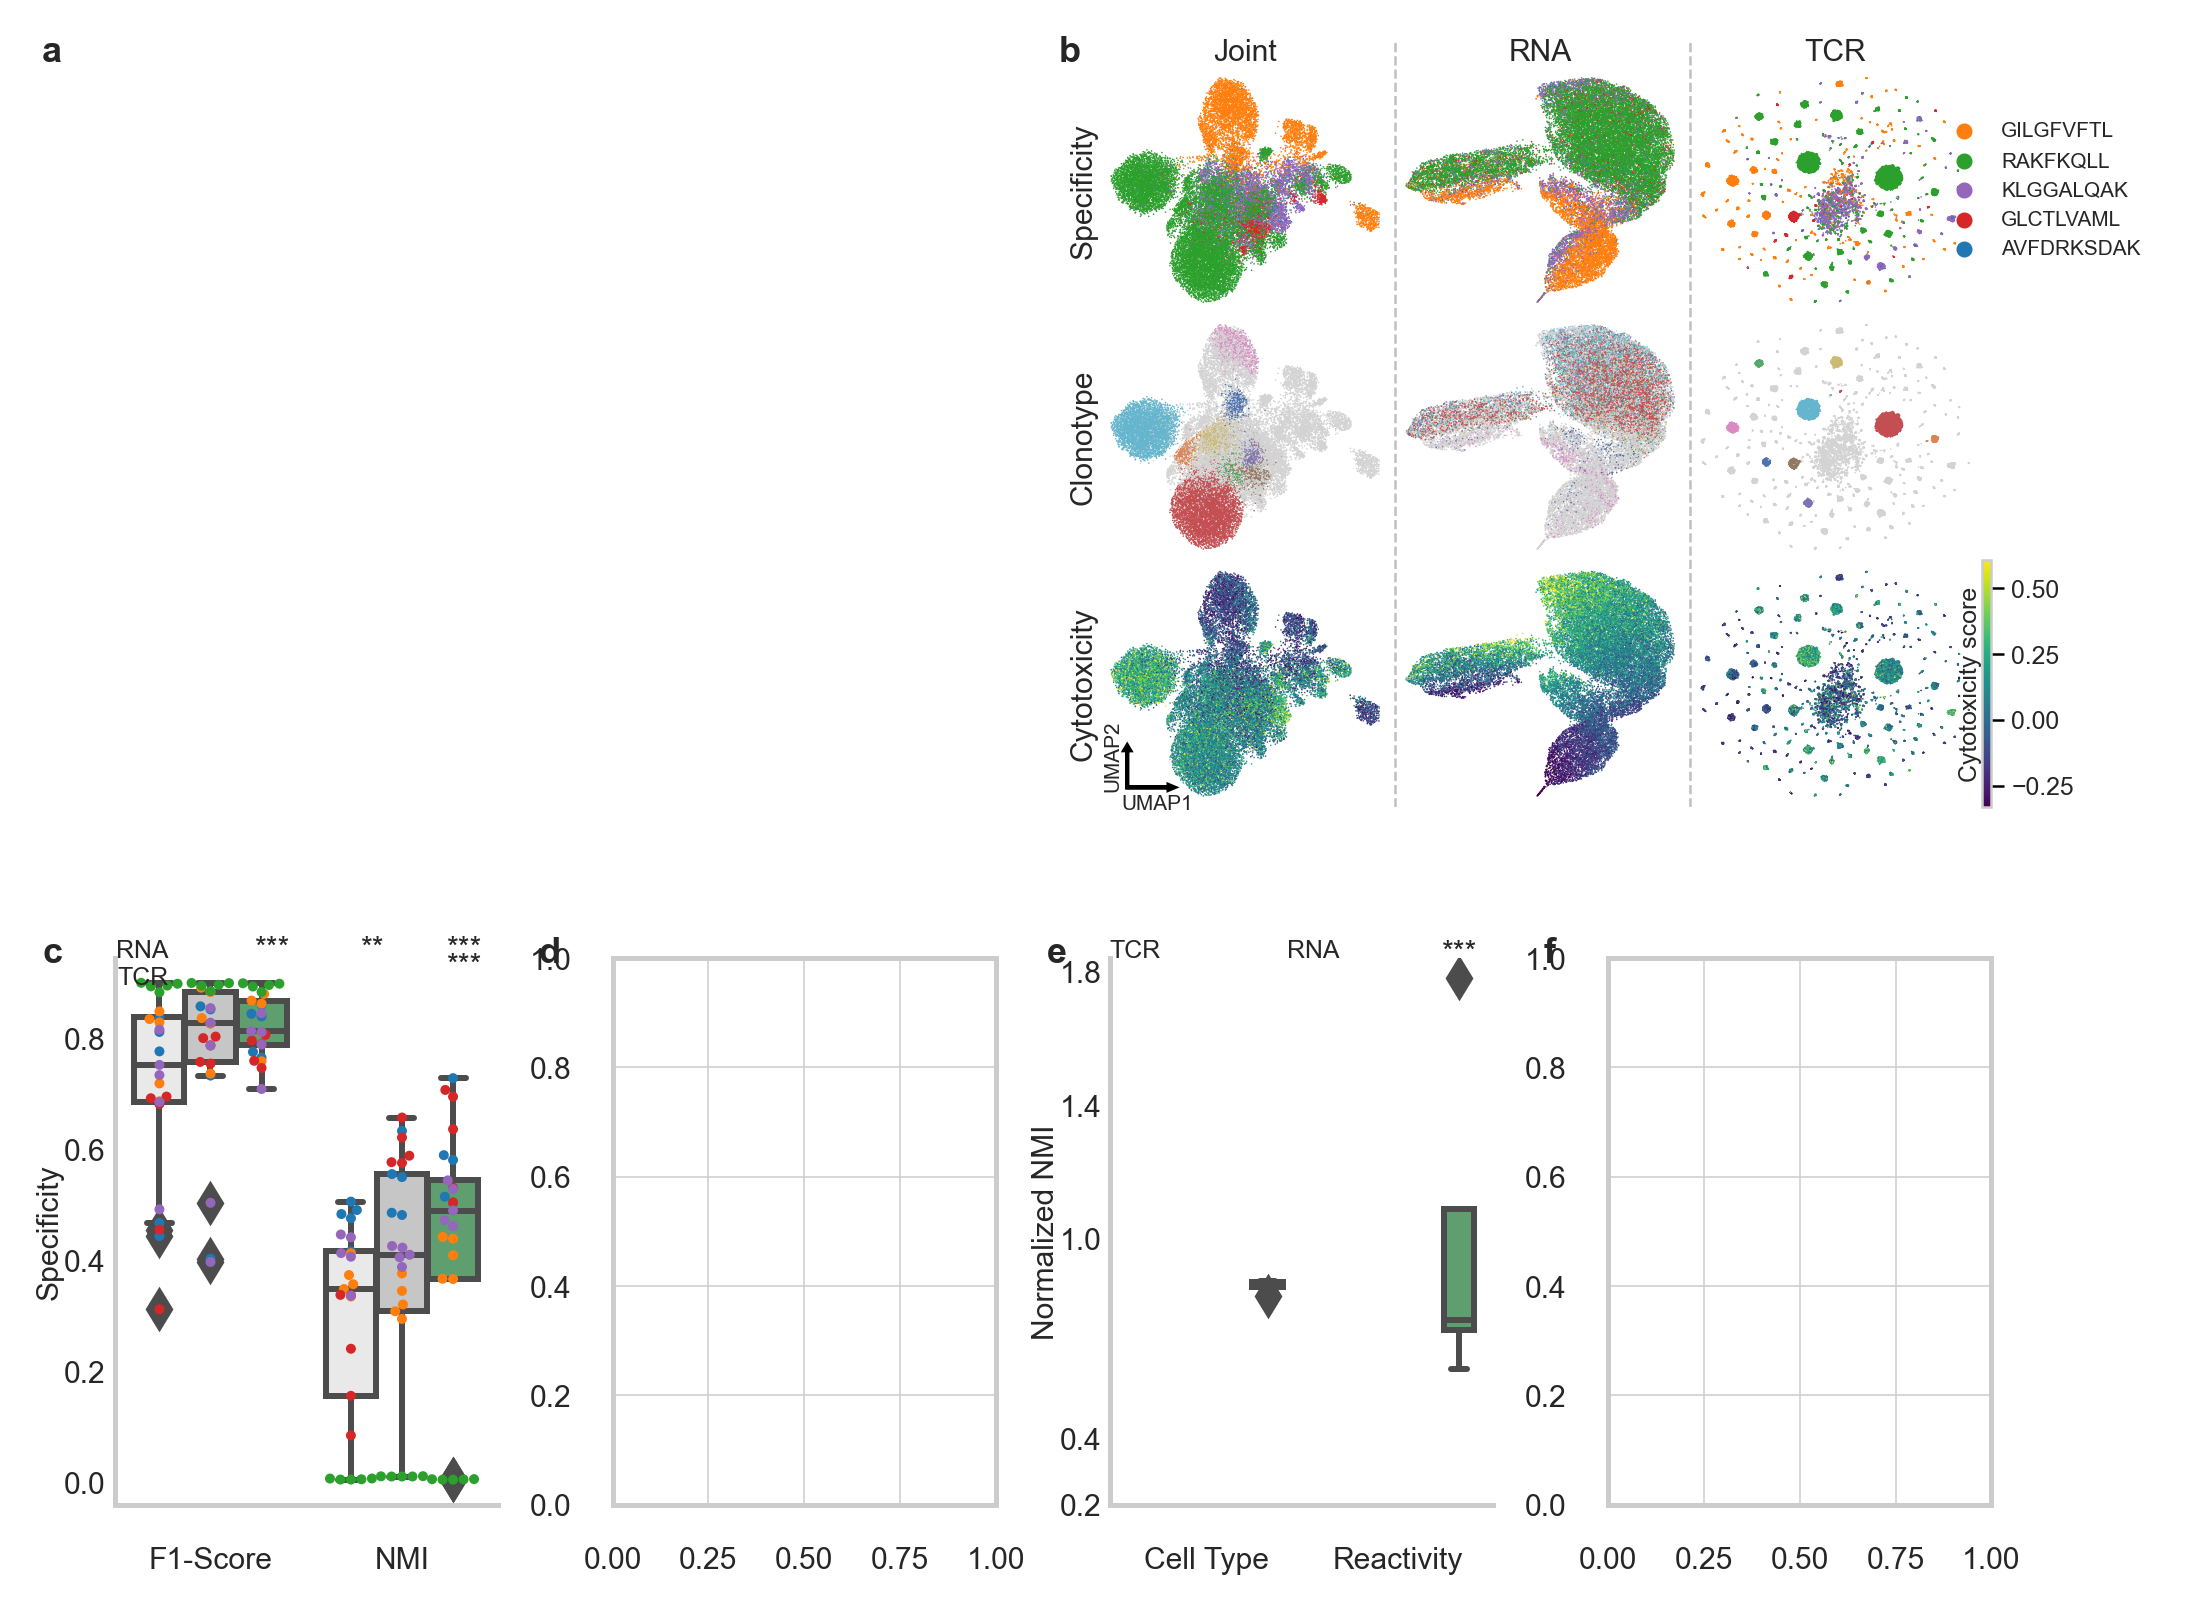

In [105]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.8),
                 dpi=DPI)
gridspecs = {}

#a    bbb c
#     bbb c
#     bbb c
#c  d  e

# a=Sketch, b=UMAPs, c=10x, d=Covid, e=Tessa


gridspecs["gs_abcde"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=1,
    height_ratios=[1.4, 1],
    width_ratios=[1],
    hspace=0.23
    #wspace=0.1,
    #left=0.00,
    #right=1,
    #top=1,
    #bottom=0,
)

gridspecs["gs_ab"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_abcde"][0],
    nrows=1,
    ncols=2,
    height_ratios=[1],
    width_ratios=[3, 3],
    wspace=0.1,
)

gridspecs["gs_b"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_ab"][1],
    nrows=4,
    ncols=4,
    height_ratios=[0.1, 1, 1, 1],
    width_ratios=[1, 1, 1, 0.03],
    wspace=0.,
    hspace=0.,
)


gridspecs["gs_cdef"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_abcde"][1],
    nrows=1,
    ncols=4,
    height_ratios=[1],
    width_ratios=[1, 1, 1, 1],
    wspace=0.3,
)


ax_a = fig.add_subplot(gridspecs["gs_ab"][0])

ax_b = {}
for i in range(16):
    ax_b[i] = fig.add_subplot(gridspecs["gs_b"][i])

ax_c = fig.add_subplot(gridspecs["gs_cdef"][0])
ax_d = fig.add_subplot(gridspecs["gs_cdef"][1])
ax_e = fig.add_subplot(gridspecs["gs_cdef"][2])
ax_f = fig.add_subplot(gridspecs["gs_cdef"][3])

#plot_image(img_model, ax_a)
plot_empty(ax_a)

plot_empty(ax_b[0])
plot_empty(ax_b[1])
plot_empty(ax_b[2])
plot_empty(ax_b[3])


plot_umap(ad_moe_2, 'binding_name', ax_b[4], ylabel='Specificity', xlabel='Joint', size=0.1)
plot_umap(ad_rna_2, 'binding_name', ax_b[5], legend=None, xlabel='RNA', size=0.1)
plot_umap(ad_tcr_2, 'binding_name', ax_b[6], legend=True, xlabel='TCR', size=0.1)
ax_b[7].axis('off')

plot_umap(ad_moe_2, 'large_clonotype', ax_b[8], ylabel='Clonotype', size=0.1)
plot_umap(ad_rna_2, 'large_clonotype', ax_b[9], size=0.1)
plot_umap(ad_tcr_2, 'large_clonotype', ax_b[10], size=0.1)
ax_b[11].axis('off')

lower, upper = np.percentile(ad_rna_2.obs['cd8 cytotoxic_score'], [1, 99])
plot_umap(ad_moe_2, 'cd8 cytotoxic_score', ax_b[12], vmin=lower, vmax=upper, ylabel='Cytotoxicity', size=0.1)
plot_umap(ad_rna_2, 'cd8 cytotoxic_score', ax_b[13], vmin=lower, vmax=upper, size=0.1)
plot_umap(ad_tcr_2, 'cd8 cytotoxic_score', ax_b[14], vmin=lower, vmax=upper, size=0.1)
plot_colorbar(ad_moe_2, 'cd8 cytotoxic_score', ax_b[15], vmin=lower, vmax=upper, name='Cytotoxicity score')

plot_umap_axis(ax_b[12], offset=-0.01)

ax_b_full =  fig.add_subplot(gridspecs["gs_b"][:, :], sharex=ax_b[4])
# set background color to transparent and turn off the frame
ax_b_full.patch.set_alpha(0)
ax_b_full.axis("off")
# plot the vertical line
ax_b_full.axvline(-2.25, c='silver', linestyle='dashed', linewidth=0.5)
ax_b_full.axvline(6.8, c='silver', linestyle='dashed', linewidth=0.5)


plot_10x_barplot(data_10x, ['RNA', 'TCR', 'mvTCR'], p_values_10x, ax_c, scale=1.035)
#plot_10x_barplot(data_avidity_2, ['RNA', 'TCR', 'mvTCR'], p_avidity_d2, ax_d, ylabel='Avidity') #todo
#plot_tessa(data_performance_tessa, p_values_tessa, ax_f)

plot_covid_barplot(ax_e, ['mvTCR'])

fig.text(0.095, 0.87, 'a', size='large', weight='bold')
fig.text(0.515, 0.87, 'b', size='large', weight='bold')
fig.text(0.095, 0.405, 'c', size='large', weight='bold')
fig.text(0.30, 0.405, 'd', size='large', weight='bold')
fig.text(0.51, 0.405, 'e', size='large', weight='bold')
fig.text(0.715, 0.405, 'f', size='large', weight='bold')


fig.tight_layout()
#fig.savefig('../figures/012_overview_performance_wo.pdf',
#           dpi=DPI, bbox_inches='tight')
#fig.savefig('../figures/012_overview_performance_wo.png',
#           dpi=DPI, bbox_inches='tight')

In [104]:
data_10x.groupby(['model', 'metric'])['score'].mean()

model   metric  
Concat  F1-Score    0.803258
        NMI         0.408546
MoE     F1-Score    0.824408
        NMI         0.421243
PoE     F1-Score    0.817120
        NMI         0.377761
RNA     F1-Score    0.721813
        NMI         0.296723
TCR     F1-Score    0.784149
        NMI         0.378775
Name: score, dtype: float64

## Supplementary Figure 1

In [ ]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 1.4),
                 dpi=DPI)
gridspecs = {}

# bbbbb
# bbbbb
# bbbbb
#  cdf

# b=UMAPs, c=10x, e=Tessa

gridspecs["gs_b"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=5,
    ncols=4,
    height_ratios=[1, 1, 1, 1, 1],
    width_ratios=[1, 1, 1, 0.03],
)



ax_b = {}
for i in range(20):
    ax_b[i] = fig.add_subplot(gridspecs["gs_b"][i])

lower, upper = np.percentile(ad_rna_1.obs['cd8 cytotoxic_score'], [1, 99])

plot_umap(ad_rna_1, 'binding_name', ax_b[0], ylabel='RNA', xlabel='Specificity', legend=True, size=0.5, bbox=1.3)
plot_umap(ad_rna_1, 'large_clonotype', ax_b[1], xlabel='Clonotype', legend=True, size=0.5, bbox=1.3)
plot_umap(ad_rna_1, 'cd8 cytotoxic_score', ax_b[2], xlabel='Cytotoxicity', size=0.5)
plot_colorbar(ad_rna_1, 'cd8 cytotoxic_score', ax_b[3], vmin=lower, vmax=upper, name='Cytotoxicity score')

plot_umap(ad_tcr_1, 'binding_name', ax_b[4], ylabel='TCR', size=0.5)
plot_umap(ad_tcr_1, 'large_clonotype', ax_b[5], size=0.5)
plot_umap(ad_tcr_1, 'cd8 cytotoxic_score', ax_b[6], size=0.5)
ax_b[7].axis('off')
#plot_colorbar(ad_tcr_1, 'cd8 cytotoxic_score', ax_b[7], vmin=lower, vmax=upper)

plot_umap(ad_cc_1, 'binding_name', ax_b[8], ylabel='Concatenation', size=0.5)
plot_umap(ad_cc_1, 'large_clonotype', ax_b[9], size=0.5)
plot_umap(ad_cc_1, 'cd8 cytotoxic_score', ax_b[10], size=0.5)
ax_b[11].axis('off')
#plot_colorbar(ad_cc_1, 'cd8 cytotoxic_score', ax_b[11], vmin=lower, vmax=upper)

plot_umap(ad_poe_1, 'binding_name', ax_b[12], ylabel='PoE', size=0.5)
plot_umap(ad_poe_1, 'large_clonotype', ax_b[13], size=0.5)
plot_umap(ad_poe_1, 'cd8 cytotoxic_score', ax_b[14], vmin=lower, vmax=upper, size=0.5)
#plot_colorbar(ad_poe_1, 'cd8 cytotoxic_score', ax_b[15], vmin=lower, vmax=upper)
ax_b[15].axis('off')

plot_umap(ad_moe_1, 'binding_name', ax_b[16], ylabel='mvTCR', size=0.5)
plot_umap(ad_moe_1, 'large_clonotype', ax_b[17], size=0.5)
plot_umap(ad_moe_1, 'cd8 cytotoxic_score', ax_b[18], vmin=lower, vmax=upper, size=0.5)
#plot_colorbar(ad_moe_1, 'cd8 cytotoxic_score', ax_b[19], vmin=lower, vmax=upper)
ax_b[19].axis('off')


plot_umap_axis(ax_b[16], offset=0.1)

fig.tight_layout()
fig.savefig('../figures/s01_umap_d1.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/s01_umap_d1.png',
           dpi=DPI, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.3),
                 dpi=DPI)
gridspecs = {}

# abc

# b=UMAPs, c=10x, e=Tessa


gridspecs["gs_abc"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=1,
    ncols=3,
    height_ratios=[1],
    width_ratios=[1, 1, 1],
    wspace=0.3
)

ax_a = fig.add_subplot(gridspecs["gs_abc"][0])
ax_c = fig.add_subplot(gridspecs["gs_abc"][1])
ax_f = fig.add_subplot(gridspecs["gs_abc"][2])

plot_10x_barplot(data_donor_1, p_values_d1, ax_a, scale=1.025)
plot_10x_barplot(data_avidity_1, p_avidity_d1, ax_c, scale=1.06)
plot_tessa(data_performance_tessa_10x_1, p_values_tessa_d1, ax_f, do_legend=True)

fig.text(0.07, 0.90, 'a', size='large', weight='bold')
fig.text(0.35, 0.90, 'b', size='large', weight='bold')
fig.text(0.63, 0.90, 'c', size='large', weight='bold')


fig.tight_layout()
fig.savefig('../figures/s02_performance_d1.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/s02_performance_d1.png',
           dpi=DPI, bbox_inches='tight')

## Supplementary Figure 3

In [ ]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 1.4),
                 dpi=DPI)
gridspecs = {}

# bbbbb
# bbbbb
# bbbbb
#  cdf

# b=UMAPs, c=10x, e=Tessa

gridspecs["gs_b"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=5,
    ncols=4,
    height_ratios=[1, 1, 1, 1, 1],
    width_ratios=[1, 1, 1, 0.03],
)



ax_b = {}
for i in range(20):
    ax_b[i] = fig.add_subplot(gridspecs["gs_b"][i])

lower, upper = np.percentile(ad_rna_2.obs['cd8 cytotoxic_score'], [1, 99])

plot_umap(ad_rna_2, 'binding_name', ax_b[0], ylabel='RNA', xlabel='Specificity', legend=True, bbox=1.4)
plot_umap(ad_rna_2, 'large_clonotype', ax_b[1], xlabel='Clonotype', legend=True, bbox=1.3)
plot_umap(ad_rna_2, 'cd8 cytotoxic_score', ax_b[2], xlabel='Cytotoxicity')
plot_colorbar(ad_rna_2, 'cd8 cytotoxic_score', ax_b[3], vmin=lower, vmax=upper, name='Cytotoxicity score')

plot_umap(ad_tcr_2, 'binding_name', ax_b[4], ylabel='TCR')
plot_umap(ad_tcr_2, 'large_clonotype', ax_b[5])
plot_umap(ad_tcr_2, 'cd8 cytotoxic_score', ax_b[6])
#plot_colorbar(ad_tcr_2, 'cd8 cytotoxic_score', ax_b[7], vmin=lower, vmax=upper)
ax_b[7].axis('off')

plot_umap(ad_cc_2, 'binding_name', ax_b[8], ylabel='Concatenation')
plot_umap(ad_cc_2, 'large_clonotype', ax_b[9])
plot_umap(ad_cc_2, 'cd8 cytotoxic_score', ax_b[10])
#plot_colorbar(ad_cc_2, 'cd8 cytotoxic_score', ax_b[11], vmin=lower, vmax=upper)
ax_b[11].axis('off')

plot_umap(ad_poe_2, 'binding_name', ax_b[12], ylabel='PoE')
plot_umap(ad_poe_2, 'large_clonotype', ax_b[13])
plot_umap(ad_poe_2, 'cd8 cytotoxic_score', ax_b[14], vmin=lower, vmax=upper)
#plot_colorbar(ad_poe_2, 'cd8 cytotoxic_score', ax_b[15], vmin=lower, vmax=upper)
ax_b[15].axis('off')

plot_umap(ad_moe_2, 'binding_name', ax_b[16], ylabel='mvTCR')
plot_umap(ad_moe_2, 'large_clonotype', ax_b[17])
plot_umap(ad_moe_2, 'cd8 cytotoxic_score', ax_b[18], vmin=lower, vmax=upper)
#plot_colorbar(ad_moe_2, 'cd8 cytotoxic_score', ax_b[19], vmin=lower, vmax=upper)
ax_b[19].axis('off')


plot_umap_axis(ax_b[16], offset=0.1)

fig.tight_layout()
fig.savefig('../figures/s03_umap_d2.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/s03_umap_d2.png',
           dpi=DPI, bbox_inches='tight')

## Values

In [ ]:
data_donor_1.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_donor_2.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_donor_2.head()

In [ ]:
data_avidity_1.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_avidity_2.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_covid_norm.groupby(['model', 'metrics'])['scores_normalized'].mean()

In [ ]:
data_performance_tessa_10x_1.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_performance_tessa.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
p_values_tessa_d1 = {metric: {'mvTCR': {'tessa': stats}} for metric, stats in p_values_tessa_d1.items()}
p_values_tessa = {metric: {'mvTCR': {'tessa': stats}} for metric, stats in p_values_tessa.items()}

In [ ]:
p_values_covid = {metric: {
    model: {
        'RNA' if metric == 'Cell Type' else 'TCR': stats
    } 
    for model, stats in p_values_covid[metric].items()}
                  for metric in p_values_covid.keys()
                 }

In [ ]:
def p_values_to_df(p_values_tmp, dataset, metric):
    models_1 = []
    models_2 = []
    t_stats = []
    p_values = []

    for m1, dict_m2 in p_values_tmp.items():
        for m2, t_scores in dict_m2.items():
            models_1.append(m1)
            models_2.append(m2)
            t_stats.append(t_scores[0])
            p_values.append(t_scores[1])

    df_p_vals = pd.DataFrame(data={'model': models_1, 'baseline': models_2, 't-statistic': t_stats, 'p-value': p_values})
    df_p_vals['dataset'] = dataset
    df_p_vals['metric'] = metric
    df_p_vals = df_p_vals[['dataset', 'metric', 'model', 'baseline', 't-statistic', 'p-value']]
    return df_p_vals

p_vals_summary = [
    (p_values_d1, '10x Donor 1'),
    (p_values_d2, '10x Donor 2'),
    (p_values_covid, 'Fischer'),
    (p_avidity_d1, '10x Donor 1'),
    (p_avidity_d2, '10x Donor 2'),
    (p_values_tessa, '10x D2 beta'),
    (p_values_tessa_d1, '10x D1 beta'),
]

dfs_p_vals = []
for summary, dataset in p_vals_summary:
    for metric, p_vals_tmp in summary.items():
        dfs_p_vals.append(p_values_to_df(p_vals_tmp, dataset, metric))
df_p_vals = pd.concat(dfs_p_vals)
df_p_vals.loc[(df_p_vals['dataset']=='10x D2 beta') & (df_p_vals['metric'].isin(['CT', 'Reactivity'])), 'dataset'] = 'Fischer beta'

df_p_vals = df_p_vals[~df_p_vals['p-value'].isna()]
df_p_vals = df_p_vals[df_p_vals['p-value']!=-99]
df_p_vals = df_p_vals.reset_index(drop=True)
df_p_vals.head(5)

In [ ]:
path_out = '../results/supplement/S1_benchmarking.xlsx'

with pd.ExcelWriter(path_out, mode='a') as writer:  
    df_p_vals.to_excel(writer, sheet_name='StatisticalAnalysis')